In [30]:
import pandas as pd
import numpy as np
import re
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import collections

In [32]:
# Create independent pandas dataframe sets for each crawler strategy
crawlers = {}
path = "results/simulation"

for f in listdir(path):
    filePath = join(path, f)

    if not isfile(filePath):
        continue
        
    m = re.search(r"Crawler-PS(\d+)-(\d+).csv", f)
        
    if m:
        crawlerVersion = int(m.group(1))
        distributionPercentage = int(m.group(2))
        
        if not crawlerVersion in crawlers:
            crawlers[crawlerVersion] = {}

        crawlers[crawlerVersion][distributionPercentage] = pd.read_csv(filePath)

for k, v in crawlers.items():
    crawlers[k] = collections.OrderedDict(sorted(v.items()))
        
print(crawlers)

{2: OrderedDict([(10,       Time  Precision  Recall
0    19620   0.149451     1.0
1    37701   0.168317     1.0
2    54746   0.170426     1.0
3    72460   0.171717     1.0
4    90604   0.172152     1.0
5   128164   0.918919     1.0
6   183284   1.000000     1.0
7    15416   0.918919     1.0
8    30593   1.000000     1.0
9    16997   0.871795     1.0
10   32779   1.000000     1.0), (20,       Time  Precision    Recall
0    15233   0.298246  1.000000
1    32343   0.978417  1.000000
2    50515   1.000000  1.000000
3    15298   0.283925  1.000000
4    31006   0.296943  1.000000
5    49761   0.299559  1.000000
6    67718   1.000000  0.992647
7    18766   0.269307  1.000000
8    38316   0.300885  1.000000
9    56698   0.303571  1.000000
10   76119   0.320755  1.000000
11   94382   0.323040  1.000000
12  110333   1.000000  0.051471), (30,       Time  Precision  Recall
0    15109   0.412121     1.0
1    34713   0.445415     1.0
2    50906   0.454343     1.0
3    67280   0.990291     1.0
4   10

In [39]:
# global attributes
plt.rcParams.update({'font.size': 18})
colors = ('blue', 'yellow', 'green', 'red', 'purple')
markers = ('o', 'v', '^', '<', '>')

def createPlot(ax1, ax2):
    ax1.set(ylabel='Precision', title='Average Precision')
    ax2.set(ylabel='Recall', xlabel='Time in seconds', title='Average Recall')
    
def plotData(crawlerVersion):
    crawlerIndex = 0
    for distributionPercentage, dataframe in crawlers[crawlerVersion].items():
        label = distributionPercentage
        ax1.plot(dataframe['Time'], dataframe['Precision'], label=label, color=colors[crawlerIndex],
                marker=markers[crawlerIndex], linestyle = 'None')
        ax2.plot(dataframe['Time'], dataframe['Recall'], label=label, color=colors[crawlerIndex],
                marker=markers[crawlerIndex], linestyle = 'None')
        crawlerIndex = (crawlerIndex + 1) % 5
    
def setPlotAttributes(ax1, ax2):
    ax1.legend(title='botmaster distr. %')
    ax2.legend(title='botmaster distr. %')
    ax1.set_ylim([0, 1.2])
    ax2.set_ylim([0, 1.2])

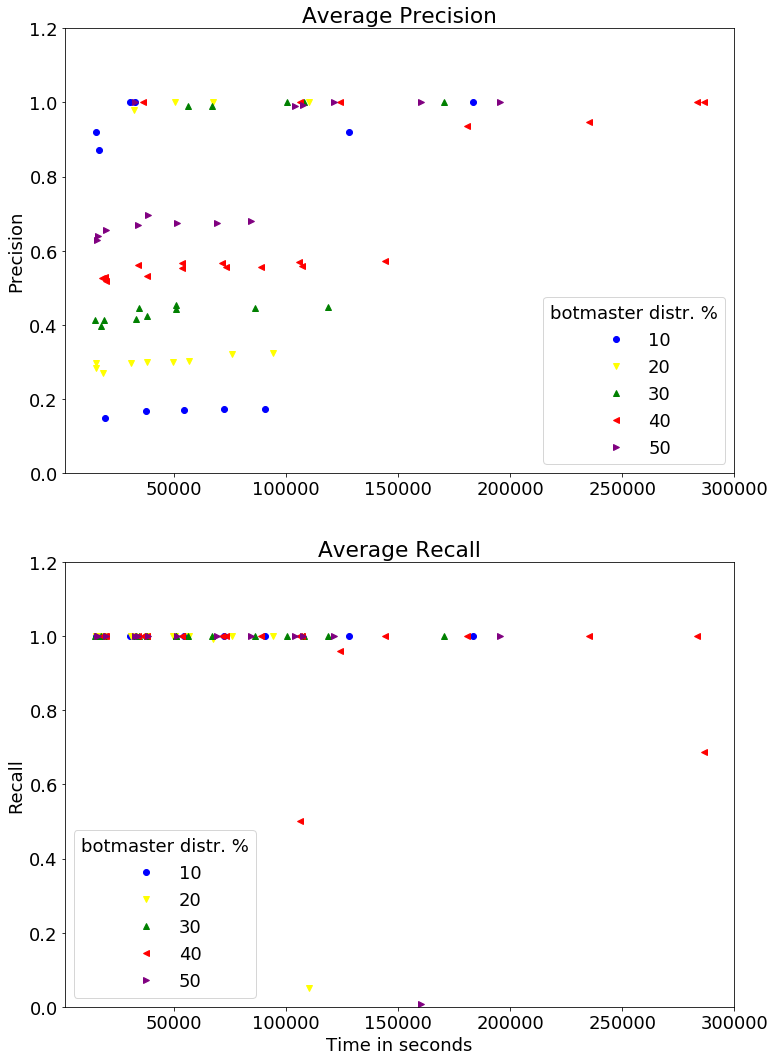

In [40]:
# Crawler-PS2
crawlerVersion = 2
if crawlerVersion in crawlers:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,18))
    
    createPlot(ax1, ax2)
    plotData(crawlerVersion)
    setPlotAttributes(ax1, ax2)

    fig.savefig('figures/Crawler-PS2.png', dpi=fig.dpi)
else:
    print('Run files could not be found!')